In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.stats import uniform

In [2]:
# load dataset
file_path = r"C:\Users\dariu\Desktop\Anomaly-detection-in-Microservices-based-systems\service anomalies dataset\service_anomalies.csv"  
df = pd.read_csv(file_path)

In [3]:
# preprocessing
features = ["99th quantile", "50th quantile", "Mean", "2xx", "4xx/5xx"]
X = df[features]
y = df["IsError"].astype(int)

# normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

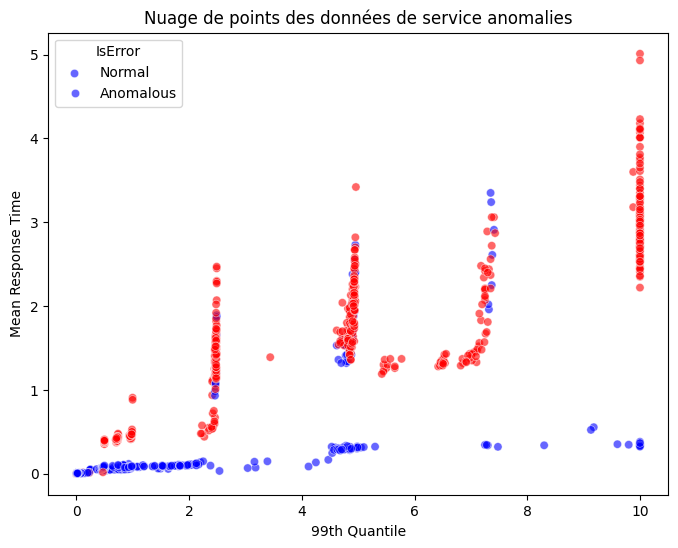

In [4]:
# Plot data distribution
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["99th quantile"], y=df["Mean"], hue=y, palette={0: "blue", 1: "red"}, alpha=0.6)
plt.xlabel("99th Quantile")
plt.ylabel("Mean Response Time")
plt.title("Nuage de points des données de service anomalies")
plt.legend(title="IsError", labels=["Normal", "Anomalous"])
plt.show()

In [5]:
# defining the hyperparameter grid for MLPClassifier
param_dist = {
    'hidden_layer_sizes': [(4, 4), (16, 8), (4, 4, 4)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.0001, 0.01]
}

# Creating the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=mlp, 
    param_grid=param_dist, 
    cv=3, 
    scoring='f1', 
    n_jobs=-1, 
    verbose=2
)

# Learning
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Meilleurs hyperparamètres :", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Meilleurs hyperparamètres : {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 8), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [6]:
# learning model with best hyperparams
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 8),
              learning_rate_init=0.01, max_iter=1000, random_state=42)

In [7]:
# Evaluation du modele
y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.98
F1-Score: 0.97


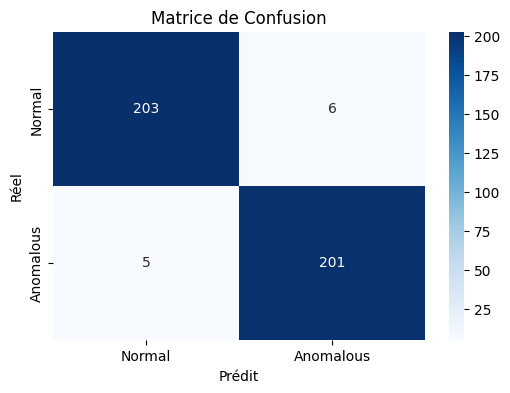

In [ ]:
classification_report(y_test, y_pred, target_names=["Normal", "Anomalous"])
# affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

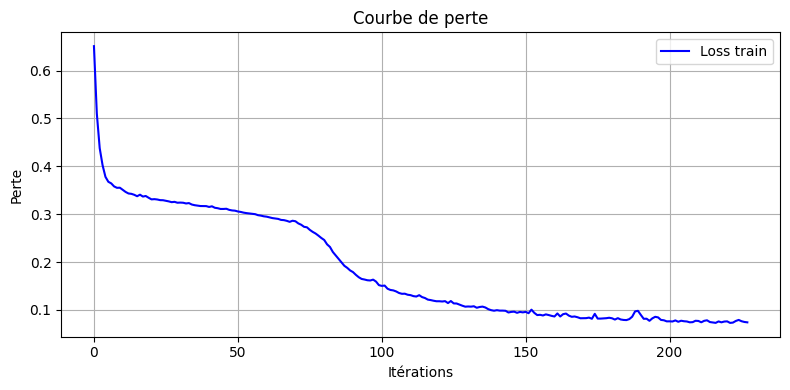

In [9]:
# Courbe de perte d'entraînement
plt.figure(figsize=(8, 4))
plt.plot(best_mlp.loss_curve_, label="Loss train", color='blue')
plt.title("Courbe de perte")
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()